In [1]:
#Set an initial interest rate
initial_state = {'r': .08}

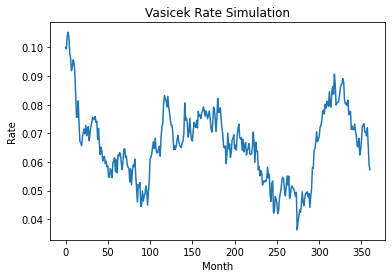

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd

#Basic vasicek rate change model
#Make sure to use RandomState()
def rate_change(r, a=.5, b=.06, sigma=.04, t=1/12):
    delta = a* (b-r) * t + t ** .5 * sigma * t ** .5 * norm.ppf(np.random.RandomState().rand())
    return delta + r


#Simple example of random monthly changes to the rate
rates = [.10]
for _ in range(360):
    rates.append(rate_change(rates[-1]))
rates = pd.Series(rates)
rates.plot(kind='line')
plt.xlabel("Month")
plt.ylabel("Rate")
plt.title("Vasicek Rate Simulation")
plt.show()

In [3]:
#Policy for updating
def vasicek_policy(_params, substep, sH, s):
    r = rate_change(s['r'])
    return {'r': r}

In [4]:
#Simple state update
def update_rate(_params, substep, sH, s, _input):
    return ('r', _input['r'])

In [5]:
#Partial updates
PSUBs = [
    {
        "policies": {
            "rate_policy": vasicek_policy,
        },
        "variables": {
            "r": update_rate,
        }
    }
]

In [6]:
#Set simulation parameters
from cadCAD.configuration.utils import config_sim

sim_config_dict = {
    'T': range(360),
    'N': 100}

c = config_sim(sim_config_dict)

In [7]:
from cadCAD.configuration import Experiment

#Build the experiment
exp = Experiment()
exp.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = PSUBs,
    sim_configs = c
)

In [8]:
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
from cadCAD import configs

exec_mode = ExecutionMode()
local_mode_ctx = ExecutionContext(context=exec_mode.single_mode)
simulation = Executor(exec_context=local_mode_ctx, configs=configs)
raw_result, tensor_field, sessions = simulation.execute()
result = pd.DataFrame(raw_result)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: single_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (360, 1, 100, 1)
Execution Method: parallelize_simulations
SimIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SubsetIDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

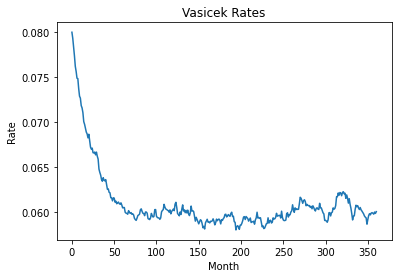

In [9]:
import matplotlib.pyplot as plt
#Visualize average path of the 100 simulations
result.groupby('timestep')['r'].mean().plot(kind='line')
plt.xlabel("Month")
plt.ylabel("Rate")
plt.title("Vasicek Rates")
plt.show()